# Reading Data

Thyroid cancer data is retrived from Kaggle website: https://www.kaggle.com/datasets/ankushpanday1/thyroid-cancer-risk-prediction-dataset/data

In [3]:
#import necessary libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.decomposition import PCA

In [4]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read data from drive
thyroid_data = pd.read_csv('/content/drive/My Drive/COURSES/Winter_2025/CIND820 XJH - Big Data Analytics Project - W202/thyroid_cancer_risk_data.csv')
print(thyroid_data.head())


   Patient_ID  Age  Gender  Country  Ethnicity Family_History  \
0           1   66    Male   Russia  Caucasian             No   
1           2   29    Male  Germany   Hispanic             No   
2           3   86    Male  Nigeria  Caucasian             No   
3           4   75  Female    India      Asian             No   
4           5   35  Female  Germany    African            Yes   

  Radiation_Exposure Iodine_Deficiency Smoking Obesity Diabetes  TSH_Level  \
0                Yes                No      No      No       No       9.37   
1                Yes                No      No      No       No       1.83   
2                 No                No      No      No       No       6.26   
3                 No                No      No      No       No       4.10   
4                Yes                No      No      No       No       9.10   

   T3_Level  T4_Level  Nodule_Size Thyroid_Cancer_Risk Diagnosis  
0      1.67      6.16         1.08                 Low    Benign  
1     

# Preprocessing

Dataset is explored to know attributes name, shape of the data frame, data types, missing values and regional location of thyroid cancer patients.

# Variable attributes, Data Types and Missing Values

The
dataset contains many features such as risk factors, demographic variables and thyroid hormone related variables. The risk factors
are family history of thyroid cancer, exposed to radiation, iodine deficiency, smoking habit, obesity and diabetes with a response yes or no. The dataset has demographics variables age, gender, country and ethnicity with thyroid hormone related variables thyroid simulating hormone (TSH), thyroxine (T4) and triiodothyronine (T3). Also, the dataset contains thyroid nodule size and thyroid cancer risk factor (low, medium or high) along with the response of thyroid cancer (benign or malignant). There is no missing values in any of 17 features; a total of 212,691 observation from different geographical regions such as Russia, Germany, Nigeria, India, UK, South Korea, Brazil, China, Japan and USA are present in the dataset.

In [ ]:
# Display the column names of the DataFrame
print("Column names in the DataFrame:")
print(thyroid_data.columns)

#Display the shape of the DataFrame
print("Shape of the DataFrame:")
print(thyroid_data.shape)

#Display the data types of the columns
print("Data types of the columns:")
print(thyroid_data.dtypes)

#Display the missing values in the DataFrame
missing_values = thyroid_data.isnull().sum()
print("Missing values in the DataFrame:", missing_values)

#Different countries in the dataset
countries = thyroid_data['Country'].unique()
print("Countries in the dataset:", countries)

Column names in the DataFrame:
Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')
Shape of the DataFrame:
(212691, 17)
Data types of the columns:
Patient_ID               int64
Age                      int64
Gender                  object
Country                 object
Ethnicity               object
Family_History          object
Radiation_Exposure      object
Iodine_Deficiency       object
Smoking                 object
Obesity                 object
Diabetes                object
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk     object
Diagnosis               object
dtype: object
Missing values in the DataFrame: Patient_ID             0
Age              

# Thyroid Cancer Distribution by Region, Gender and Ethnicity

Following the graphical representation of thyroid cancer patients by country, ethnicity and gender (below figures), it is observed that the highest number of malignant thyroid cancer patients are identified in India followed by China and Nigeria. Asian
ethnic patients are more identified as having malignant thyroid cancer followed by African ethnicity than Caucasian. Female
patients are more identified with malignant thyroid cancer than the male patients; this supports the Canadian cancer society
reporting that in 2024 more female was diagnosed with thyroid cancer than male.

<Figure size 600x500 with 0 Axes>

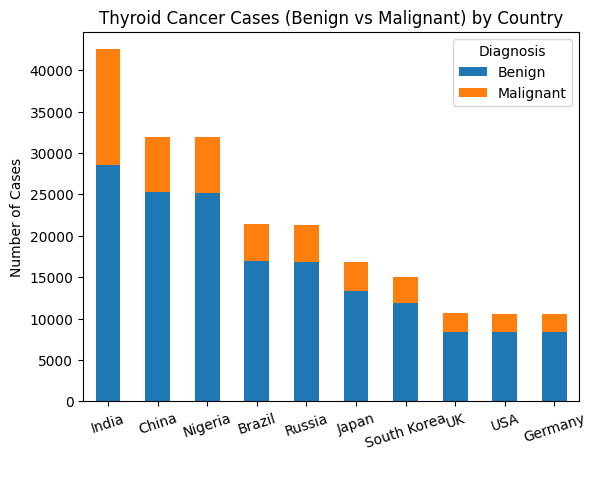

<Figure size 600x500 with 0 Axes>

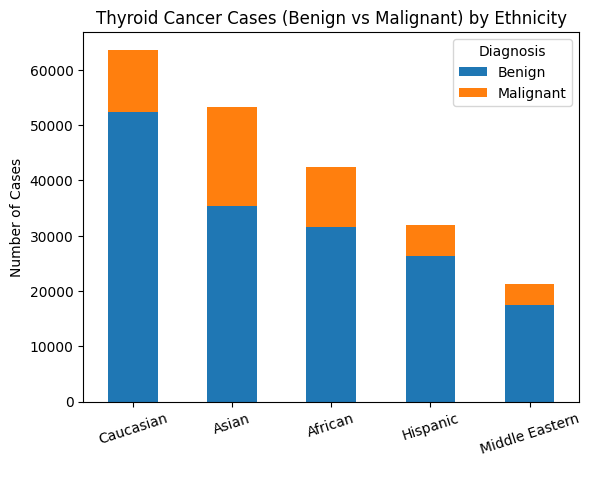

<Figure size 600x500 with 0 Axes>

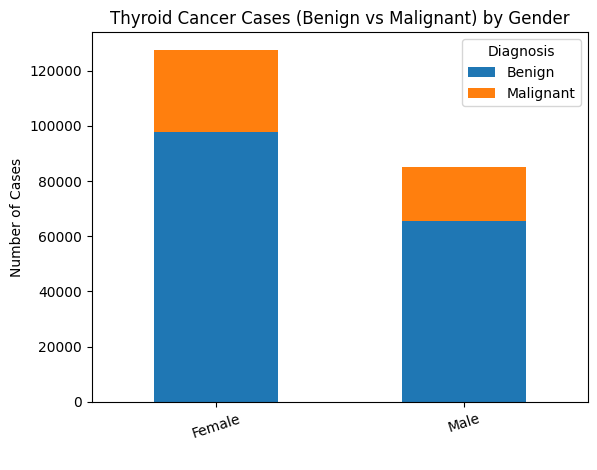

In [ ]:
def myPlot(data, var):
    plt.figure(figsize=(6, 5))
    sorted_data = thyroid_data.groupby([var, 'Diagnosis']).size().unstack().fillna(0)
    sorted_data['Total'] = sorted_data.sum(axis=1)
    sorted_data = sorted_data.sort_values(by='Total', ascending=False).drop(columns='Total')
    sorted_data.plot(kind='bar', stacked=True)
    plt.title('Thyroid Cancer Cases (Benign vs Malignant) by '+var)
    plt.xlabel(' ')
    plt.ylabel('Number of Cases')
    plt.xticks(rotation=18)
    plt.legend(title='Diagnosis')
    plt.show()

myPlot(thyroid_data, 'Country')
myPlot(thyroid_data, 'Ethnicity')
myPlot(thyroid_data, 'Gender')

# Summary Statistics

Percentage of patients for each categorical variables rounded to 2 decimal places are shown below. Dataset has 60% female and 40% male patients. The percentage of patients to smoking and diabetes as yes vs. no is 20% vs. 80%. Percetage of patients with obesity no vs. yes is 30% vs. 70%.

In [10]:
print("Proportion by categorical variables (rounded to 2 decimal places):")
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\n{column}:\n{thyroid_data[column].value_counts(normalize=True).round(2)*100}")

Proportion by categorical variables (rounded to 2 decimal places):

Gender:
Gender
Female    60.0
Male      40.0
Name: proportion, dtype: float64

Country:
Country
India          20.0
China          15.0
Nigeria        15.0
Brazil         10.0
Russia         10.0
Japan           8.0
South Korea     7.0
UK              5.0
USA             5.0
Germany         5.0
Name: proportion, dtype: float64

Ethnicity:
Ethnicity
Caucasian         30.0
Asian             25.0
African           20.0
Hispanic          15.0
Middle Eastern    10.0
Name: proportion, dtype: float64

Family_History:
Family_History
No     70.0
Yes    30.0
Name: proportion, dtype: float64

Radiation_Exposure:
Radiation_Exposure
No     85.0
Yes    15.0
Name: proportion, dtype: float64

Iodine_Deficiency:
Iodine_Deficiency
No     75.0
Yes    25.0
Name: proportion, dtype: float64

Smoking:
Smoking
No     80.0
Yes    20.0
Name: proportion, dtype: float64

Obesity:
Obesity
No     70.0
Yes    30.0
Name: proportion, dtype: float64

D

Summary statistics of all continuous variables rounded to 2 decimal places is shown below. The minimum age of patients in the dataset is 15 years, and maximum age is 89 years with a mean age of 51.92 years and standard deviation of 21.63 years.  

In [11]:
continuous_columns = thyroid_data.select_dtypes(include=['number']).columns
continuous_columns_except_id = continuous_columns.drop('Patient_ID', errors='ignore')
summary_stats = thyroid_data[continuous_columns_except_id].describe().round(2)
print(summary_stats)

             Age  TSH_Level   T3_Level   T4_Level  Nodule_Size
count  212691.00  212691.00  212691.00  212691.00    212691.00
mean       51.92       5.05       2.00       8.25         2.50
std        21.63       2.86       0.87       2.16         1.44
min        15.00       0.10       0.50       4.50         0.00
25%        33.00       2.57       1.25       6.37         1.25
50%        52.00       5.04       2.00       8.24         2.51
75%        71.00       7.52       2.75      10.12         3.76
max        89.00      10.00       3.50      12.00         5.00


The continuous variables have different scales/units, for example, age has unit years while thyroid related hormones have unit milliliter (ml). Thus, before we fit any machine learning algorithm, it is important to scale the variables to have the same scale. The MinMax scaling function is chosen from Python library **sklearn.preprocessing**, which scales the continuous variables to have mean 0 with standard deviation 1.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the continuous variables
scaled_df = scaler.fit_transform(thyroid_data[continuous_columns_except_id])

# Create a new DataFrame with the scaled data
scaled_data = pd.DataFrame(scaled_df, columns=continuous_columns_except_id)

# Print the scaled data
print(scaled_data.head())


        Age  TSH_Level  T3_Level  T4_Level  Nodule_Size
0  0.689189   0.936364  0.390000  0.221333        0.216
1  0.189189   0.174747  0.410000  0.805333        0.810
2  0.959459   0.622222  0.696667  0.809333        0.922
3  0.810811   0.404040  0.706667  0.872000        0.492
4  0.270270   0.909091  0.536667  0.828000        0.422


Merge the scaled data back into the original Thyroid data frame.

In [13]:
thyroid_data = pd.concat([thyroid_data.drop(columns=continuous_columns_except_id), scaled_data], axis=1)

# Print the head of the merged DataFrame
print(thyroid_data.head())


   Patient_ID  Gender  Country  Ethnicity Family_History Radiation_Exposure  \
0           1    Male   Russia  Caucasian             No                Yes   
1           2    Male  Germany   Hispanic             No                Yes   
2           3    Male  Nigeria  Caucasian             No                 No   
3           4  Female    India      Asian             No                 No   
4           5  Female  Germany    African            Yes                Yes   

  Iodine_Deficiency Smoking Obesity Diabetes Thyroid_Cancer_Risk Diagnosis  \
0                No      No      No       No                 Low    Benign   
1                No      No      No       No                 Low    Benign   
2                No      No      No       No                 Low    Benign   
3                No      No      No       No              Medium    Benign   
4                No      No      No       No                High    Benign   

        Age  TSH_Level  T3_Level  T4_Level  Nodule_Size 

# Predictive Analysis

The structure of predictive analysis - first we split the data as train and test, then choose a model, training the model, evaluate the model, and deploy the model for prediction.


# Split the data into training and testing sets

Using a random state for reproducibility, the dataset is splited as train and test data; 80% of the data is kept a train data on which the machine learning algorithms will be fitted, and the rest of the 20% data is kept as test data for evaluation of model performance and accuracy of prediction.  

In [14]:
X = thyroid_data.drop('Diagnosis', axis=1)  # Features
y = thyroid_data['Diagnosis']  # Target variable

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (170152, 28)
X_test shape: (42539, 28)
y_train shape: (170152,)
y_test shape: (42539,)


# K-Nearest Neighbour

Since grid search automates the process of testing multiple K values along with other hyperparameters, we use GridSearchCV from Python library **sklearn.model_selection** to search through different combinations of K values and evaluate the performance using cross-validation. This process is very long time consuming; the optimal value of k is found to be 5.

In [7]:
from sklearn.neighbors import KNeighborsClassifier #import library
knn = KNeighborsClassifier(n_neighbors=5) #initialize algorithm
knn.fit(X_train, y_train)  # fit model on train data

y_pred = knn.predict(X_test) #predict on test data

accuracy = accuracy_score(y_test, y_pred) #find prediction accuracy
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
cm_df

Accuracy: 0.7214320976045511
              precision    recall  f1-score   support

      Benign       0.77      0.91      0.83     32615
   Malignant       0.24      0.09      0.13      9924

    accuracy                           0.72     42539
   macro avg       0.50      0.50      0.48     42539
weighted avg       0.64      0.72      0.67     42539

Confusion Matrix:


,Predicted Benign,Predicted Malignant
Actual Benign,29832,2783
Actual Malignant,9067,857


K-nearest neighbour classification algorithm has 72.46% accuracy on test data to predict thyroid cancer patients as malignant or benign. The algorithm has shown 77% precision on begnign patients while on malignant patients this precision is 25%.

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000) #initialize algorithm
logreg.fit(X_train, y_train) #model fit on train data

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test) #prediction of test data

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))
cm=confusion_matrix(y_test, y_pred_logreg)
cm_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
cm_df

Logistic Regression Accuracy: 0.8250546557276852
              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

Confusion Matrix:


,Predicted Benign,Predicted Malignant
Actual Benign,30657,1958
Actual Malignant,5484,4440


Logistic Regession algorithm has 82.50% accuracy on test data, and the precision of logistic regression is 85% on begnign patients and 69% on malignant patients.

# Decision Tree

The optimization of decision tree classifier is performed by pre-pruning;  maximum depth of the tree is used as a control variable for pre-pruning. Also, the attribute selection measure `entropy' is used as control parameter.

In [17]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree}")
print(classification_report(y_test, y_pred_dtree))
cm=confusion_matrix(y_test, y_pred_dtree)
cm_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
cm_df

Decision Tree Accuracy: 0.8250546557276852
              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

Confusion Matrix:


,Predicted Benign,Predicted Malignant
Actual Benign,30657,1958
Actual Malignant,5484,4440


Decision tree algorithm has 82.50% accuracy on test data, and the precision of logistic regression is 85% on begnign patients and 69% on malignant patients. This is the same accuracy and precision found from Logistic regression algorithm.

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))
cm=confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
cm_df

Random Forest Accuracy: 0.8246315146101225
              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.70      0.44      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539

Confusion Matrix:


,Predicted Benign,Predicted Malignant
Actual Benign,30693,1922
Actual Malignant,5538,4386


We first create an instance of the Random forest model with the default parameters. Then we fit the model to train data. After that we pass both the features and the target variable so the model can learn to predict. Random forest algorithm has shown an accuracy of 82.46% on test data, and precision of 85% on benign and 70% on malignant patients.

# Principal Component Analysis

Since the dataset has both the continuous and categorical feature variables; the principal component analysis will
be based on the FAMD() function from Python library **Prince**. The FAMD () function implements the principal component method dedicated to explore data with both continuous and categorical variables.

In [20]:
import prince # prompt: PCA using prince library
pca = prince.PCA(n_components=2) # Reduce to 2 principal components
pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# You can now use X_train_pca in your models
print(X_train_pca.head())


component         0         1
117332    -0.983684  0.420102
63420      0.634109  1.414092
179948     0.438161  1.863838
187371    -1.053475  1.168609
103129     0.339955 -0.111860


In [21]:
from sklearn.neighbors import KNeighborsClassifier #import library
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_knn_pca = knn_pca.predict(X_test_pca)
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
print(f"KNN Accuracy with PCA: {accuracy_knn_pca}")
print(classification_report(y_test, y_pred_knn_pca))
cm=confusion_matrix(y_test, y_pred_knn_pca)
cm_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
cm_df

KNN Accuracy with PCA: 0.7980206398834011
              precision    recall  f1-score   support

      Benign       0.83      0.92      0.87     32615
   Malignant       0.60      0.39      0.47      9924

    accuracy                           0.80     42539
   macro avg       0.72      0.66      0.67     42539
weighted avg       0.78      0.80      0.78     42539

Confusion Matrix:


,Predicted Benign,Predicted Malignant
Actual Benign,30064,2551
Actual Malignant,6041,3883


**Prediction accuracy with KNN after PCA:** We transform the data on two principal components that explains the majority of the varianaces. The principal components (eigenvectors) are shown above. After finding the principal components and transforming data on to it, we re-apply KNN algorithm on PCA transformed data. Below it shows that KNN algorithm has now an accuracy of 79.80%, which is bit higher accuracy than the accuracy 72.14% found from the dataset without any PCA transformation.  

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree_pca = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtree_pca.fit(X_train_pca, y_train)
y_pred_dtree_pca = dtree_pca.predict(X_test_pca)
accuracy_dtree_pca = accuracy_score(y_test, y_pred_dtree_pca)
print(f"Decision Tree Accuracy with PCA: {accuracy_dtree_pca}")
print(classification_report(y_test, y_pred_dtree_pca))
cm=confusion_matrix(y_test, y_pred_dtree_pca)
cm_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
cm_df


Decision Tree Accuracy with PCA: 0.825007640047956
              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

Confusion Matrix:


,Predicted Benign,Predicted Malignant
Actual Benign,30653,1962
Actual Malignant,5482,4442


**Prediction accuracy with decision Tree after PCA:** The prediction accuracy is the same 82.50% from the decision tree regardless of whether the full dataset or PCA transformed data is fitted into the model.

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_pca = RandomForestClassifier() #initialize algorithm
rf_pca.fit(X_train_pca, y_train) #fit model
y_pred_rf_pca = rf_pca.predict(X_test_pca) #prediction of test data
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print(f"Random Forest Accuracy with PCA: {accuracy_rf_pca}")
print(classification_report(y_test, y_pred_rf_pca))
cm=confusion_matrix(y_test, y_pred_rf_pca)
cm_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'],
                     columns=['Predicted Benign', 'Predicted Malignant'])

# Display the confusion matrix as a table
print("Confusion Matrix:")
cm_df

Random Forest Accuracy with PCA: 0.8036155057711747
              precision    recall  f1-score   support

      Benign       0.83      0.93      0.88     32615
   Malignant       0.63      0.39      0.48      9924

    accuracy                           0.80     42539
   macro avg       0.73      0.66      0.68     42539
weighted avg       0.79      0.80      0.79     42539

Confusion Matrix:


,Predicted Benign,Predicted Malignant
Actual Benign,30288,2327
Actual Malignant,6027,3897


**Prediction accuracy with Random Forest after PCA:** The prediction accuracy from PCA transformed data is 80.30% using random forest algorithm, which is a bit lower than when the full dataset is used to predict the accuracy. On full dataset the accuracy is found to be 82.46%.

# Model Performance Comparison

Below we generate a bar chart of all the accuracies found from different machine learning algorithms.  

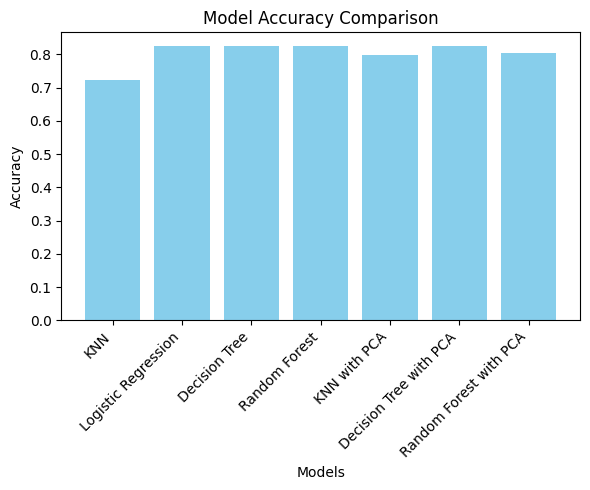

In [24]:
accuracies = {
    'KNN': accuracy,
    'Logistic Regression': accuracy_logreg,
    'Decision Tree': accuracy_dtree,
    'Random Forest': accuracy_rf,
    'KNN with PCA': accuracy_knn_pca,
    'Decision Tree with PCA': accuracy_dtree_pca,
    'Random Forest with PCA': accuracy_rf_pca
}

models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(6, 5))
plt.bar(models, accuracy_values, color='skyblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [25]:
df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
df


,Model,Accuracy
0,KNN,0.721432
1,Logistic Regression,0.825055
2,Decision Tree,0.825055
3,Random Forest,0.824632
4,KNN with PCA,0.798021
5,Decision Tree with PCA,0.825008
6,Random Forest with PCA,0.803616


**Discussion:** Comparing the model performance on prediction accuracy, it is observed that KNN has the lowest prediction accuracy among all the machine learning algorithms that have been used in this analysis (Ref. bar chart). Logistic regression, Decision Tree and Random Forest have almost the same prediction accuracy (Ref. bar chart), but these prediction accurices decrease on PCA transformed data except KNN algorithm. The KNN algorithm performs better prediction accuracy on PCA transformed dataset than the original dataset.  